# Book Recommendation Sysetem:

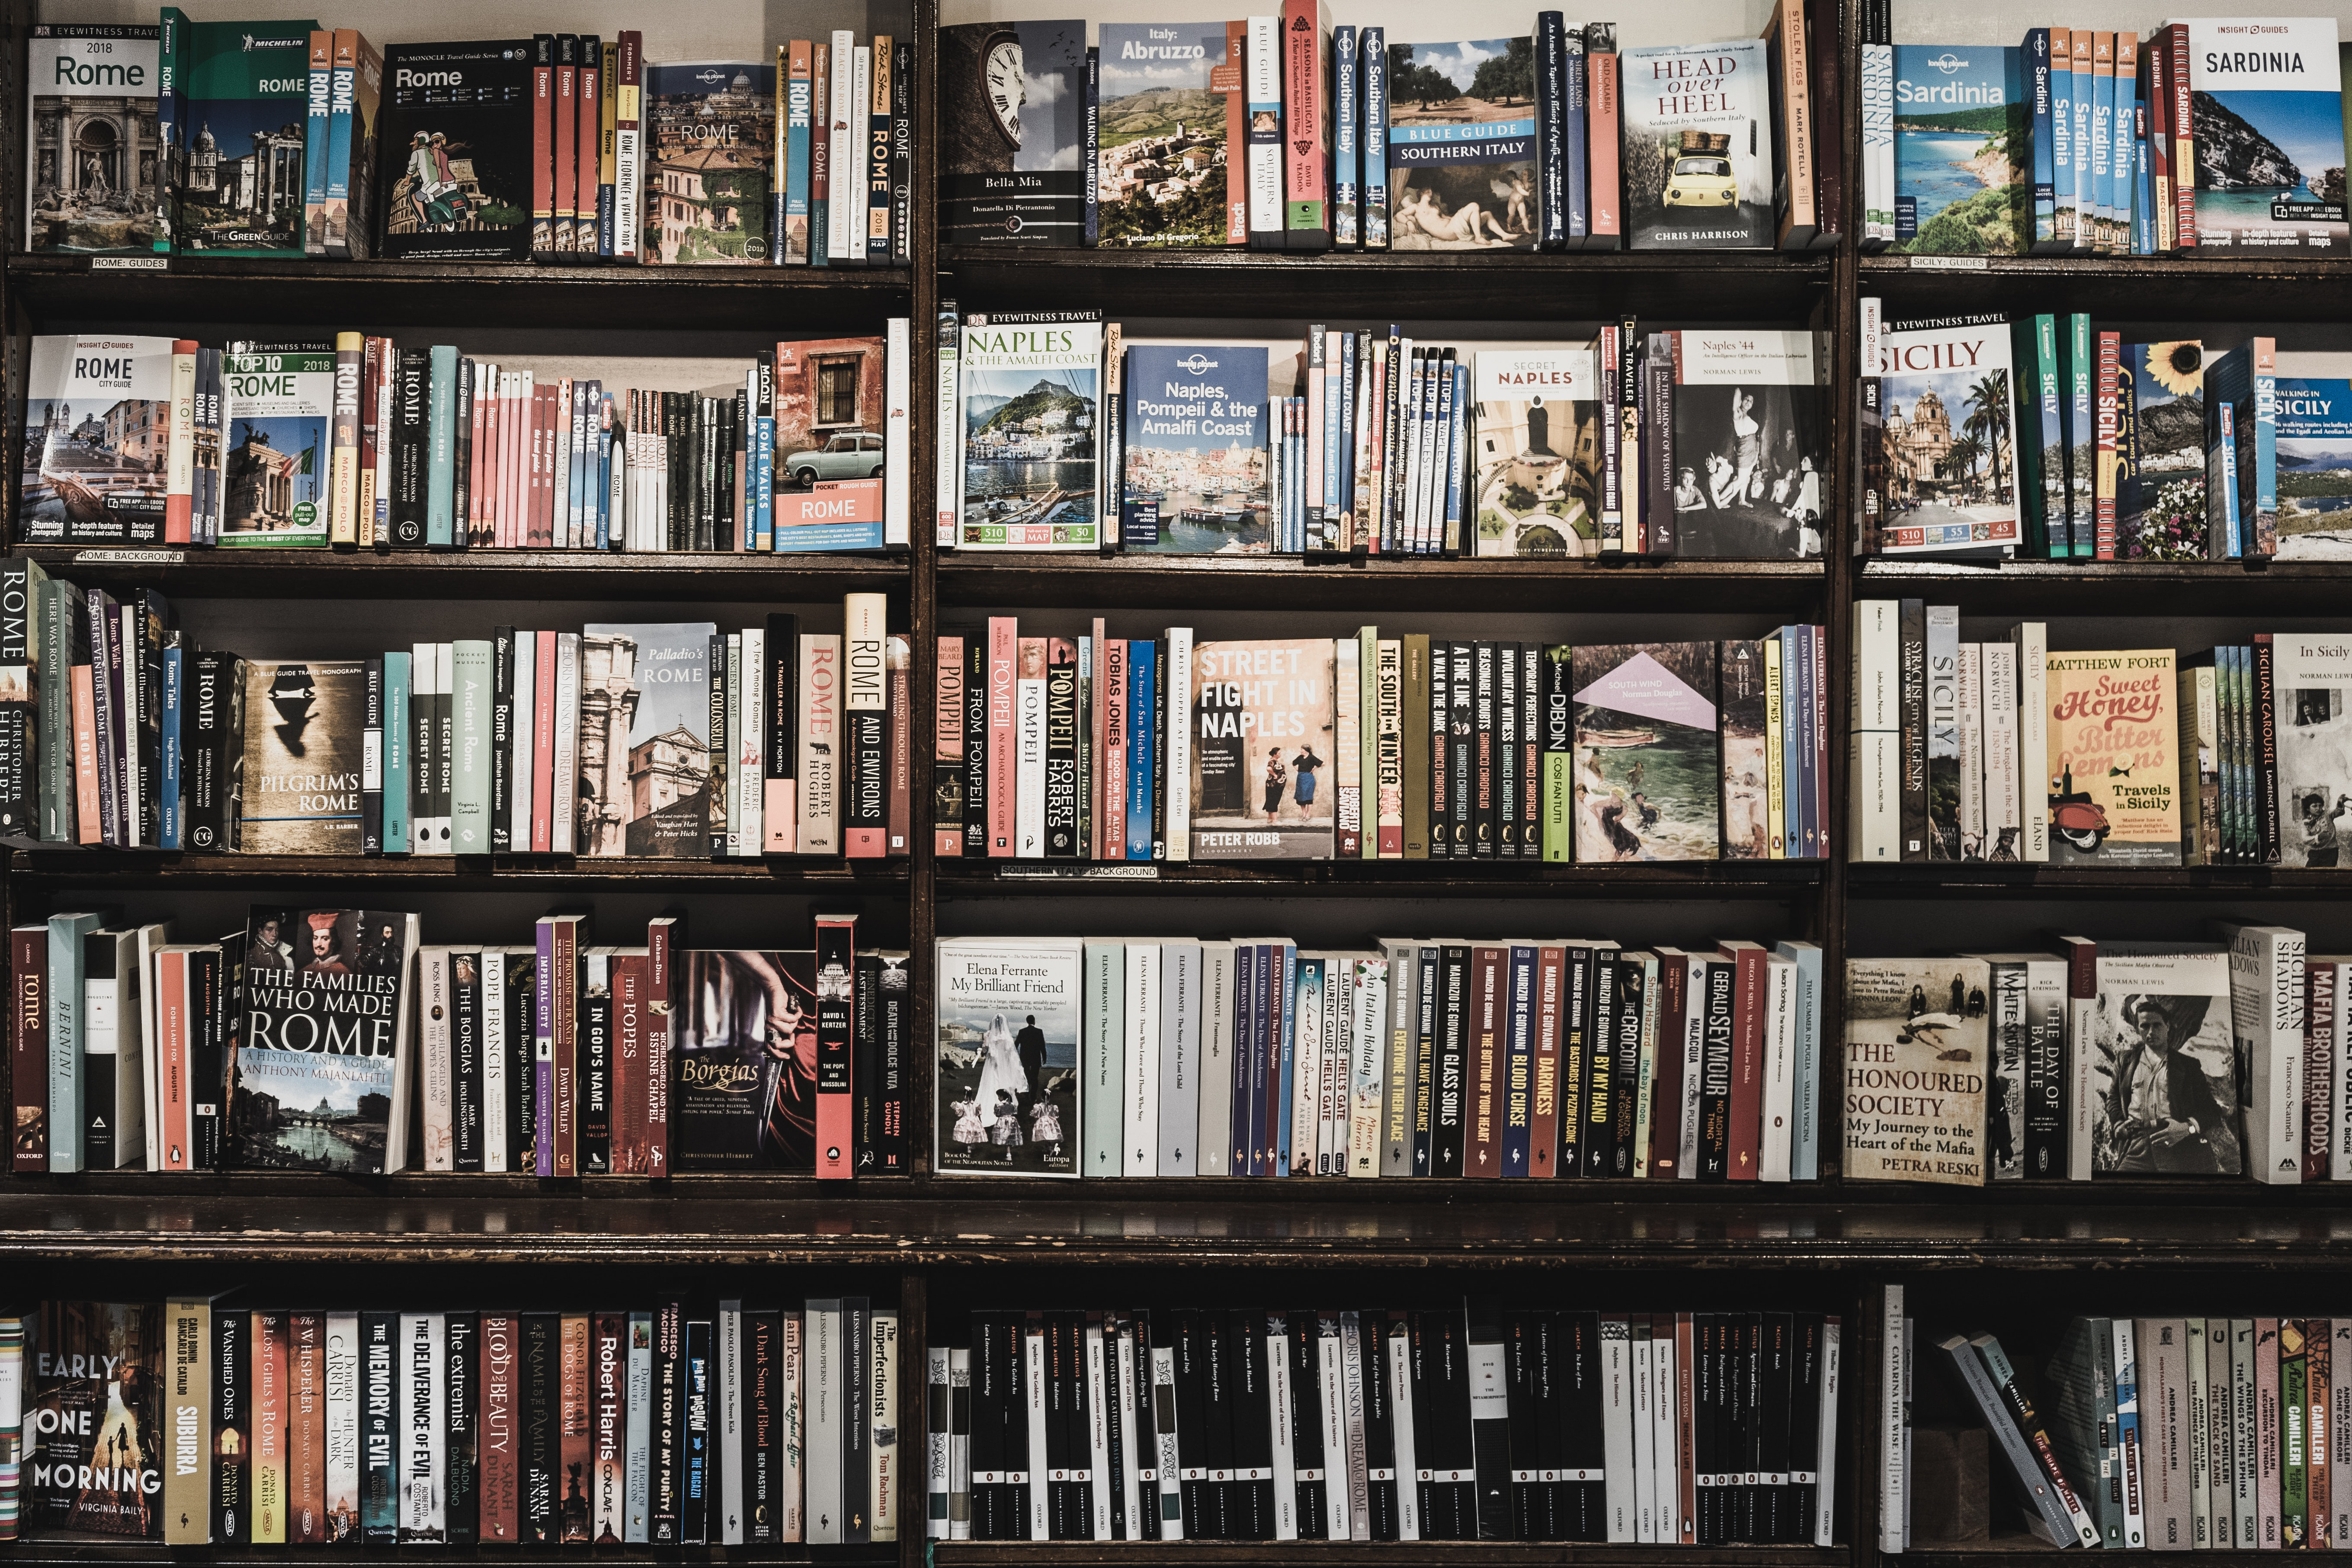

## About:
We are going to build a book recommendation sysetm. It's a machine learning projct and the dataset for this project is downloaded from [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset).

## Recommendation System?
Generally recommendation means to refer or give suggetion to the user/customer.
* **Let's take an analog:** When we are going to a shop to buy a cloth then we ask for the cloths and guy named `CHHOTU` (mostly) come up with verity of samples and we ask for more according to our choice, right?  

So, it the age of technology where we buy things online so there also need to be a `CHHOTU`, right. A recommender system does this work accoding to the customer input data.  
* **But wait:** we done't have the customer's input data. So, the question is how I'll know what customer will want, right? But we have the products data right so according to the product properties we can recommend other similar products to the customer.


* **Let's take a situation:** Suppose a reader and your mood is to read fiction book let's take *Harry Potter* the favorite one and you opened **Kindle** as you'll click on *Harry Potter* I as a Shop owner (Kindle) don't know any thing about you but you have clicked on *Harry Potter* so, I can recommend you books with same *Genre (adventure) / Writter / Story etc.* and may be after reading *Harry Potter* you will read or add to your wishlist another one too, right? 

So, we are going to do the same thing I mean going to build a `CHHOTU` to recommend the books based on some property similar to we mentioned in the above situation.

## Types of Recommendation System:
They are maily four types
1. **Popularity Based:** The most popular books (/product) on the basis of rating or other factors it's totaly formula based.
2. **Content Based:** Similar books (/product) it's depend on product in case of books/movies it can be Genre, Story, Writer, etc.
3. **Collaborative Filterng Based:** This based on user's rating on the books (/product).
4. **Hybride Recommender System:** It is the combination of the above three in some proportion depnding on the domain & requirements.

Let's start step-by-step!

## Step 1: Installing the required libraries

In [1]:
!pip install opendatasets

## Step 2: Importing the libraries

In [2]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 3: Downloading the dataset

In [3]:
data = od.download('https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset')

Skipping, found downloaded files in ".\book-recommendation-dataset" (use force=True to force download)


In [4]:
os.listdir('book-recommendation-dataset')

['Books.csv', 'Ratings.csv', 'Users.csv']

### Note:
* In the downloaded dataset we have three `.csv` files with Books name, rating, and users data. So, let's load them.

## Step 4: Loading the datasets:

In [5]:
books=pd.read_csv('book-recommendation-dataset/Books.csv')
ratings=pd.read_csv('book-recommendation-dataset/Ratings.csv')
users=pd.read_csv('book-recommendation-dataset/Users.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_13872\449221883.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('book-recommendation-dataset/Books.csv')


## Step 5: View the datasets:

In [6]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [7]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [8]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

## Step 5: Explore the datasets

In [9]:
# Let's see the shape of these datasets:
print('Shape of the Books dataset : ',books.shape)
print('Shape of the Users dataset : ',users.shape)
print('Shape of the Ratings dataset : ',ratings.shape)

Shape of the Books dataset :  (271360, 8)
Shape of the Users dataset :  (278858, 3)
Shape of the Ratings dataset :  (1149780, 3)


In [10]:
# Let's see the missing values:
print('Missing values in Books dataset: \n \n',books.isnull().sum())
print('..........................................................')
print(' ')

print('Missing values Users in dataset: \n \n',users.isnull().sum())
print('..........................................................')
print(' ')

print('Missing values Ratings in dataset: \n \n',ratings.isnull().sum())
print('..........................................................')
print(' ')

Missing values in Books dataset: 
 
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
..........................................................
 
Missing values Users in dataset: 
 
 User-ID          0
Location         0
Age         110762
dtype: int64
..........................................................
 
Missing values Ratings in dataset: 
 
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
..........................................................
 


In [11]:
# Let's check the duplicates:
print('Duplicate values in Books dataset: \n \n',books.duplicated().sum())
print('..........................................................')
print(' ')

print('Duplicate values in Users dataset: \n \n',users.duplicated().sum())
print('..........................................................')
print(' ')

print('Duplicate values in Ratings dataset: \n \n',ratings.duplicated().sum())
print('..........................................................')
print(' ')

Duplicate values in Books dataset: 
 
 0
..........................................................
 
Duplicate values in Users dataset: 
 
 0
..........................................................
 
Duplicate values in Ratings dataset: 
 
 0
..........................................................
 


### Let's see the Unique values of the columns of each dataset:

In [12]:
#Books
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [13]:
print('Unique values in Books dataset: \n')
col_names=['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']
for name in col_names: 
    print(books[name].value_counts(),'\n \n','-------------------------------------------------------------------------')

Unique values in Books dataset: 

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne My

In [14]:
#Users
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [15]:
print('Unique values in Users dataset: \n')
col_names=['Location', 'Age']
for name in col_names: 
    print(users[name].value_counts(),'\n \n','-------------------------------------------------------------------------')

Unique values in Users dataset: 

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64 
 
 -------------------------------------------------------------------------
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: Age, Length: 165, dtype: int64 
 
 -------------------------------------------------------

In [16]:
#Ratings
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [17]:
print('Unique values in Ratings dataset: \n')
col_names=['Book-Rating']
for name in col_names: 
    print(ratings[name].value_counts())

Unique values in Ratings dataset: 

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64


## Step 6: Recommendation Model Building

## 1. Popularity Based Recommender System:
We are going to build a model based on rating and the formula is vary simple we just take the mean with certain criteria:
* We consider only top 100 books with maximum rating.
* we consider those books which have at least 250 ratings.
* We take the mean as formula.
* Since we are buliding popularty based system. So we use only books & ratings datasets.

In [18]:
# Let's see the commonality between the rating and books datasets:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher                                        Image-URL-S  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   
1    HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...

In [19]:
ratings.head(2)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5

### Note:
* The common column is `ISBN` in both the dataset.So, let's merge them.


In [20]:
rating_with_name=ratings.merge(books,on='ISBN')
rating_with_name.head(2)

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/034545104X.0...

In [21]:
rating_with_name.shape

(1031136, 10)

### Note:
* After merger this data is decreased. The reason is there some books in `ratings` dataset which are not present in `books` dataset.


### Now we filter the top 100 books which have at least 250 ratings with their average rating:

In [22]:
rating_with_name.groupby('Book-Title').count()

User-ID  ISBN  \
Book-Title                                                          
 A Light in the Storm: The Civil War Diary of A...        4     4   
 Always Have Popsicles                                    1     1   
 Apple Magic (The Collector's series)                     1     1   
 Ask Lily (Young Women of Faith: Lily Series, B...        1     1   
 Beyond IBM: Leadership Marketing and Finance f...        1     1   
...                                                     ...   ...   
Ã?Â?lpiraten.                                             2     2   
Ã?Â?rger mit Produkt X. Roman.                            4     4   
Ã?Â?sterlich leben.                                       1     1   
Ã?Â?stlich der Berge.                                     3     3   
Ã?Â?thique en toc                                         2     2   

                                                    Book-Rating  Book-Author  \
Book-Title                                                                     
 A Light in the Storm: The Civil War Diary of A...            4            4   
 Always Have Popsicles                                        1            1   
 Apple Magic (The Collector's series)                         1            1   
 Ask Lily (Young Women of Faith: Lily Series, B...            1            1   
 Beyond IBM: Leadership Marketing and Finance f...            1            1   
...                                                         ...          ...   
Ã?Â?lpiraten.                                                 2            2   
Ã?Â?rger mit Produkt X. Roman.                                4            4   
Ã?Â?sterlich leben.                                           1            1   
Ã?Â?stlich der Berge.                                         3            3   
Ã?Â?thique en toc                                             2            2   

                                                    Year-Of-Publication  \
Book-Title                                                                
 A Light in the Storm: The Civil War Diary of A...                    4   
 Always Have Popsicles                                                1   
 Apple Magic (The Collector's series)                                 1   
 Ask Lily (Young Women of Faith: Lily Series, B...                    1   
 Beyond IBM: Leadership Marketing and Finance f...                    1   
...                                                                 ...   
Ã?Â?lpiraten.                                                         2   
Ã?Â?rger mit Produkt X. Roman.                                        4   
Ã?Â?sterlich leben.                                                   1   
Ã?Â?stlich der Berge.                                                 3   
Ã?Â?thique en toc                                                     2   

                                                    Publisher  Image-URL-S  \
Book-Title                                                                   
 A Light in the Storm: The Civil War Diary of A...          4            4   
 Always Have Popsicles                                      1            1   
 Apple Magic (The Collector's series)                       1            1   
 Ask Lily (Young Women of Faith: Lily Series, B...          1            1   
 Beyond IBM: Leadership Marketing and Finance f...          1            1   
...                                                       ...          ...   
Ã?Â?lpiraten.                                               2            2   
Ã?Â?rger mit Produkt X. Roman.                              4            4   
Ã?Â?sterlich leben.                                         1            1   
Ã?Â?stlich der Berge.                                       3            3   
Ã?Â?thique en toc                                           2            2   

                                                    Image-URL-M  Image-URL-L  
Book-Title                                 

In [23]:
#Let's filter books with numnber of rating on the book 
num_rating_df=rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'Number-Of-Rating'},inplace=True)
num_rating_df

Book-Title  Number-Of-Rating
0        A Light in the Storm: The Civil War Diary of ...                 4
1                                   Always Have Popsicles                 1
2                    Apple Magic (The Collector's series)                 1
3        Ask Lily (Young Women of Faith: Lily Series, ...                 1
4        Beyond IBM: Leadership Marketing and Finance ...                 1
...                                                   ...               ...
241066                                      Ã?Â?lpiraten.                 2
241067                     Ã?Â?rger mit Produkt X. Roman.                 4
241068                                Ã?Â?sterlich leben.                 1
241069                              Ã?Â?stlich der Berge.                 3
241070                                  Ã?Â?thique en toc                 2

[241071 rows x 2 columns]

In [24]:
#Now we filter the same data with calculated average rating on the books:
avg_rating_df=rating_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Average-Rating'},inplace=True)
avg_rating_df

Book-Title  Average-Rating
0        A Light in the Storm: The Civil War Diary of ...        2.250000
1                                   Always Have Popsicles        0.000000
2                    Apple Magic (The Collector's series)        0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...        8.000000
4        Beyond IBM: Leadership Marketing and Finance ...        0.000000
...                                                   ...             ...
241066                                      Ã?Â?lpiraten.        0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.        5.250000
241068                                Ã?Â?sterlich leben.        7.000000
241069                              Ã?Â?stlich der Berge.        2.666667
241070                                  Ã?Â?thique en toc        4.000000

[241071 rows x 2 columns]

In [25]:
# Let's merge the both
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

Book-Title  Number-Of-Rating  \
0        A Light in the Storm: The Civil War Diary of ...                 4   
1                                   Always Have Popsicles                 1   
2                    Apple Magic (The Collector's series)                 1   
3        Ask Lily (Young Women of Faith: Lily Series, ...                 1   
4        Beyond IBM: Leadership Marketing and Finance ...                 1   
...                                                   ...               ...   
241066                                      Ã?Â?lpiraten.                 2   
241067                     Ã?Â?rger mit Produkt X. Roman.                 4   
241068                                Ã?Â?sterlich leben.                 1   
241069                              Ã?Â?stlich der Berge.                 3   
241070                                  Ã?Â?thique en toc                 2   

        Average-Rating  
0             2.250000  
1             0.000000  
2             0.000000  
3             8.000000  
4             0.000000  
...                ...  
241066        0.000000  
241067        5.250000  
241068        7.000000  
241069        2.666667  
241070        4.000000  

[241071 rows x 3 columns]

In [26]:
# Let's seprate the books which have at least 250 ratings:
popular_df=popular_df[popular_df['Number-Of-Rating']>=250].sort_values('Average-Rating',ascending=False).head(100)
popular_df

Book-Title  Number-Of-Rating  \
80434   Harry Potter and the Prisoner of Azkaban (Book 3)               428   
80422        Harry Potter and the Goblet of Fire (Book 4)               387   
80441      Harry Potter and the Sorcerer's Stone (Book 1)               278   
80426   Harry Potter and the Order of the Phoenix (Boo...               347   
80414    Harry Potter and the Chamber of Secrets (Book 2)               556   
...                                                   ...               ...   
176827                                    The Beach House               435   
191926                                 The Hours: A Novel               294   
89780                                          Icy Sparks               309   
14351                     Angela's Ashes (MMP) : A Memoir               326   
86511                                      How to Be Good               304   

        Average-Rating  
80434         5.852804  
80422         5.824289  
80441         5.737410  
80426         5.501441  
80414         5.183453  
...                ...  
176827        3.347126  
191926        3.346939  
89780         3.346278  
14351         3.337423  
86511         3.305921  

[100 rows x 3 columns]

### Now we will combine the `Book-Title` with `Book-Image`:

In [27]:
popular_df.merge(books,on='Book-Title')

Book-Title  Number-Of-Rating  \
0    Harry Potter and the Prisoner of Azkaban (Book 3)               428   
1    Harry Potter and the Prisoner of Azkaban (Book 3)               428   
2    Harry Potter and the Prisoner of Azkaban (Book 3)               428   
3         Harry Potter and the Goblet of Fire (Book 4)               387   
4         Harry Potter and the Goblet of Fire (Book 4)               387   
..                                                 ...               ...   
346                                         Icy Sparks               309   
347                    Angela's Ashes (MMP) : A Memoir               326   
348                                     How to Be Good               304   
349                                     How to Be Good               304   
350                                     How to Be Good               304   

     Average-Rating        ISBN    Book-Author Year-Of-Publication  \
0          5.852804  0439136350  J. K. Rowling                1999   
1          5.852804  0439136369  J. K. Rowling                2001   
2          5.852804  0786222743  J. K. Rowling                2000   
3          5.824289  0439139597  J. K. Rowling                2000   
4          5.824289  0439139600  J. K. Rowling                2002   
..              ...         ...            ...                 ...   
346        3.346278  067087311X    Gwynn Rubio                1998   
347        3.337423  0684872153  Frank McCourt                1999   
348        3.305921  1573229326    Nick Hornby                2002   
349        3.305921  1573221937    Nick Hornby                2001   
350        3.305921  039914823X    Nick Hornby                2001   

                 Publisher                                        Image-URL-S  \
0               Scholastic  http://images.amazon.com/images/P/0439136350.0...   
1               Scholastic  http://images.amazon.com/images/P/0439136369.0...   
2          Thorndike Press  http://images.amazon.com/images/P/0786222743.0...   
3               Scholastic  http://images.amazon.com/images/P/0439139597.0...   
4    Scholastic Paperbacks  http://images.amazon.com/images/P/0439139600.0...   
..                     ...                                                ...   
346           Viking Books  http://images.amazon.com/images/P/067087311X.0...   
347               Scribner  http://images.amazon.com/images/P/0684872153.0...   
348        Riverhead Books  http://images.amazon.com/images/P/1573229326.0...   
349        Riverhead Books  http://images.amazon.com/images/P/1573221937.0...   
350           Putnam Adult  http://images.amazon.com/images/P/039914823X.0...   

                                           Image-URL-M  \
0    http://images.amazon.com/images/P/0439136350.0...   
1    http://images.amazon.com/images/P/0439136369.0...   
2    http://images.amazon.com/images/P/0786222743.0...   
3    http://images.amazon.com/images/P/0439139597.0...   
4    http://images.amazon.com/images/P/0439139600.0...   
..                                                 ...   
346  http://images.amazon.com/images/P/067087311X.0...   
347  http://images.amazon.com/images/P/0684872153.0...   
348  http://images.amazon.com/images/P/1573229326.0...   
349  http://images.amazon.com/images/P/1573221937.0...   
350  http://images.amazon.com/images/P/039914823X.0...   

                                           Image-URL-L  
0    http://images.amazon.com/images/P/0439136350.0...  
1    http://images.amazon.com/images/P/0439136369.0...  
2    http://images.amazon.com/images/P/0786222743.0...  
3    http://images.amazon.com/images/P/0439139597.0...  
4    http://images.amazon.com/images/P/0439139600.0...  
..                                                 ...  
346  http://images.amazon.com/images/P/067087311X.0...  
347  http://images.amazon.com/images/P/0684872153.0...  
348  http://images.amazon.com/images/P/1573229326.0...  
349  http://images.amazon.com/images/P/1573221937.

### Note:
* Our 100 books becomes 196 the reason is a single book (eg. Harry Potter) is multiple times with different ISBN number.
* So, let's remove the duplicates.

In [28]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Number-Of-Rating','Average-Rating','Year-Of-Publication']]
popular_df

Book-Title         Book-Author  \
0    Harry Potter and the Prisoner of Azkaban (Book 3)       J. K. Rowling   
3         Harry Potter and the Goblet of Fire (Book 4)       J. K. Rowling   
5       Harry Potter and the Sorcerer's Stone (Book 1)       J. K. Rowling   
9    Harry Potter and the Order of the Phoenix (Boo...       J. K. Rowling   
13    Harry Potter and the Chamber of Secrets (Book 2)       J. K. Rowling   
..                                                 ...                 ...   
338                                    The Beach House     James Patterson   
344                                 The Hours: A Novel  Michael Cunningham   
345                                         Icy Sparks    Gwyn Hyman Rubio   
347                    Angela's Ashes (MMP) : A Memoir       Frank McCourt   
348                                     How to Be Good         Nick Hornby   

                                           Image-URL-M  Number-Of-Rating  \
0    http://images.amazon.com/images/P/0439136350.0...               428   
3    http://images.amazon.com/images/P/0439139597.0...               387   
5    http://images.amazon.com/images/P/0590353403.0...               278   
9    http://images.amazon.com/images/P/043935806X.0...               347   
13   http://images.amazon.com/images/P/0439064872.0...               556   
..                                                 ...               ...   
338  http://images.amazon.com/images/P/0446612545.0...               435   
344  http://images.amazon.com/images/P/0312305060.0...               294   
345  http://images.amazon.com/images/P/0142000205.0...               309   
347  http://images.amazon.com/images/P/0684872153.0...               326   
348  http://images.amazon.com/images/P/1573229326.0...               304   

     Average-Rating Year-Of-Publication  
0          5.852804                1999  
3          5.824289                2000  
5          5.737410                1998  
9          5.501441                2003  
13         5.183453                2000  
..              ...                 ...  
338        3.347126                2003  
344        3.346939                2002  
345        3.346278                2001  
347        3.337423                1999  
348        3.305921                2002  

[100 rows x 6 columns]

In [29]:
popular_df.shape

(100, 6)

### Conclusion:
This is our filterd dataset to fulfil the requrements of buliding a `Popularity Based Recommender System`.

## 2. Collaborative Filtering Based Recommender Sysetem
* In this recommender system we merge the `books` and `ratings` dataset.
* Filter the data of `users`, `book-title`, and `rating`.
* Finally Rearrange them similar to below:

| Books\Users | user1 | user2 | user3 | user4| ---------------| userN|
| ----- ------|-------|-------|-------|------|----------------|------|
|       book1 |   5   |   3   |  1    |   0  |----------------|  NaN |
|       book1 |   4   |   9   |  2    |   6  |----------------|  10  |
|       book1 |   3   |   1   |  4    |   8  |----------------|  NaN |
|       book1 |   7   |   NaN |  5    |   3  |----------------|  6   |
|       book1 |   5   |   2   |  3    |  NaN |----------------|  9   |
|       book1 |   10  |   9   |  1    |   9  |----------------|  5   |
|       book1 |   .   |   .   |  .    |   .  |----------------|   .  |
|       book1 |   .   |   .   |  .    |   .  |----------------|   .  |
|       book1 |   6   |   7   |  6    |   0  |----------------|  2   |

### Note:
We cannot take all the data after filtering so we need to set some limits for this I'm limiting with
1. We'll consider only those users which have given at least 250 ratings on any books in our dataset (Filtering the experience or regular user or readers).
2. We'll consider only those books which have at least 50 ratings (Filtering the popular books).

In [30]:
# We have already merged dataset:
rating_with_name.head(3)

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
2     6543  034545104X            0  Flesh Tones: A Novel  M. J. Rose   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   
2                2002  Ballantine Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/034545104X.0...  
2  http://images.amazon.com/images/P/034545104X.0...

In [31]:
# Filtering the users who rated to at least 250 books 
x=rating_with_name.groupby('User-ID').count()['Book-Rating']>=250
selected_user=x[x].index  #Boolian indexing
selected_user

Int64Index([   254,   2276,   2766,   3363,   4385,   6251,   6543,   6575,
              7158,   7346,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=613)

In [32]:
filtered_users=rating_with_name[rating_with_name['User-ID'].isin(selected_user)]
filtered_users

User-ID        ISBN  Book-Rating  \
2           6543  034545104X            0   
5          23768  034545104X            0   
7          28523  034545104X            0   
15         77940  034545104X            0   
16         81977  034545104X            0   
...          ...         ...          ...   
1030883   275970  1880837927            0   
1030884   275970  188717897X            0   
1030885   275970  1888889047            0   
1030886   275970  1931868123            0   
1030887   275970  3411086211           10   

                                                Book-Title  \
2                                     Flesh Tones: A Novel   
5                                     Flesh Tones: A Novel   
7                                     Flesh Tones: A Novel   
15                                    Flesh Tones: A Novel   
16                                    Flesh Tones: A Novel   
...                                                    ...   
1030883                         The Theology of the Hammer   
1030884  The Ordeal of Integration: Progress and Resent...   
1030885  Pushcart's Complete Rotten Reviews &amp; Rejec...   
1030886  There's a Porcupine in My Outhouse: Misadventu...   
1030887                                         Die Biene.   

                           Book-Author Year-Of-Publication  \
2                           M. J. Rose                2002   
5                           M. J. Rose                2002   
7                           M. J. Rose                2002   
15                          M. J. Rose                2002   
16                          M. J. Rose                2002   
...                                ...                 ...   
1030883                 Millard Fuller                1994   
1030884              Orlando Patterson                1998   
1030885                 Bill Henderson                1998   
1030886                   Mike Tougias                2002   
1030887  Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt                1993   

                                    Publisher  \
2                            Ballantine Books   
5                            Ballantine Books   
7                            Ballantine Books   
15                           Ballantine Books   
16                           Ballantine Books   
...                                       ...   
1030883         Smyth &amp; Helwys Publishing   
1030884                Civitas Book Publisher   
1030885                        Pushcart Press   
1030886                    Capital Books (VA)   
1030887  Bibliographisches Institut, Mannheim   

                                               Image-URL-S  \
2        http://images.amazon.com/images/P/034545104X.0...   
5        http://images.amazon.com/images/P/034545104X.0...   
7        http://images.amazon.com/images/P/034545104X.0...   
15       http://images.amazon.com/images/P/034545104X.0...   
16       http://images.amazon.com/images/P/034545104X.0...   
...                                                    ...   
1030883  http://images.amazon.com/images/P/1880837927.0...   
1030884  http://images.amazon.com/images/P/188717897X.0...   
1030885  http://images.amazon.com/images/P/1888889047.0...   
1030886  http://images.amazon.com/images/P/1931868123.0...   
1030887  http://images.amazon.com/images/P/3411086211.0...   

                                               Image-URL-M  \
2        http://images.amazon.com/images/P/034545104X.0...   
5        http://images.amazon.com/images/P/034545104X.0...   
7        http://images.amazon.com/images/P/034545104X.0...   
15       http://images.amazon.com/images/P/034545104X.0...   
16       http://images.amazon.com/images/P/034545104X.0...   
...                                                    ...   
1030883  http://images.amazon.com/images/P/1880837927.0...   
1030884  http://images.amazon.com/images/P/188717897X.0...   
1030885  http://images.amazon.com/images/P/1888889047.0...   
1030886  http://images.a

### Note:
* We can see there are only `4,29,537` Users form `11,49,780` rating Users who have rated at least `250` books.

### Now we will filter this data on the basis of Books criteria:

In [33]:
y=filtered_users.groupby('Book-Title').count()['Book-Rating']>=50
selected_books=y[y].index #Boolean indexing
selected_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Fine Balance',
       'A Heartbreaking Work of Staggering Genius',
       ...
       'Wild Animus', 'Winter Moon', 'Winter Solstice', 'Wish You Well',
       'Without Remorse', 'Wuthering Heights', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=574)

In [34]:
filered_user_rating_book_df=filtered_users[filtered_users['Book-Title'].isin(selected_books)]
filered_user_rating_book_df

User-ID        ISBN  Book-Rating  \
63        278418  0446520802            0   
65          3363  0446520802            0   
66          7158  0446520802           10   
69         11676  0446520802           10   
74         23768  0446520802            6   
...          ...         ...          ...   
1025422   264317  0833563505            0   
1026724   266865  0531001725           10   
1028777   271284  0440910927            0   
1029070   271705  B0001PIOX4            0   
1030868   275970  1586210661            9   

                                                Book-Title  \
63                                            The Notebook   
65                                            The Notebook   
66                                            The Notebook   
69                                            The Notebook   
74                                            The Notebook   
...                                                    ...   
1025422  The Queen of the Damned (Vampire Chronicles (P...   
1026724                             The Catcher in the Rye   
1028777                                      The Rainmaker   
1029070                                     Fahrenheit 451   
1030868                             Me Talk Pretty One Day   

                   Book-Author Year-Of-Publication                Publisher  \
63             Nicholas Sparks                1996             Warner Books   
65             Nicholas Sparks                1996             Warner Books   
66             Nicholas Sparks                1996             Warner Books   
69             Nicholas Sparks                1996             Warner Books   
74             Nicholas Sparks                1996             Warner Books   
...                        ...                 ...                      ...   
1025422              Anne Rice                1999          Sagebrush Bound   
1026724  Jerome David Salinger                1973   Scholastic Library Pub   
1028777           John Grisham                1995                   Island   
1029070           Ray Bradbury                1993     Simon &amp; Schuster   
1030868          David Sedaris                2001  Time Warner Audio Major   

                                               Image-URL-S  \
63       http://images.amazon.com/images/P/0446520802.0...   
65       http://images.amazon.com/images/P/0446520802.0...   
66       http://images.amazon.com/images/P/0446520802.0...   
69       http://images.amazon.com/images/P/0446520802.0...   
74       http://images.amazon.com/images/P/0446520802.0...   
...                                                    ...   
1025422  http://images.amazon.com/images/P/0833563505.0...   
1026724  http://images.amazon.com/images/P/0531001725.0...   
1028777  http://images.amazon.com/images/P/0440910927.0...   
1029070  http://images.amazon.com/images/P/B0001PIOX4.0...   
1030868  http://images.amazon.com/images/P/1586210661.0...   

                                               Image-URL-M  \
63       http://images.amazon.com/images/P/0446520802.0...   
65       http://images.amazon.com/images/P/0446520802.0...   
66       http://images.amazon.com/images/P/0446520802.0...   
69       http://images.amazon.com/images/P/0446520802.0...   
74       http://images.amazon.com/images/P/0446520802.0...   
...                                                    ...   
1025422  http://images.amazon.com/images/P/0833563505.0...   
1026724  http://images.amazon.com/images/P/0531001725.0...   
1028777  http://images.amazon.com/images/P/0440910927.0...   
1029070  http://images.amazon.com/images/P/B0001PIOX4.0...   
1030868  http://images.amazon.com/images/P/1586210661.0...   

                                               Image-URL-L  
63       http://images.amazon.com/images/P/0446520802.0...  
65       http://images.amazon.com/images/P/0446520802.0...  
66       http://images.amazon.com/images/P/0446520802.0...  
69       http://images.amazon.com/images

In [35]:
# Check the duplicates:
filered_user_rating_book_df.drop_duplicates()

User-ID        ISBN  Book-Rating  \
63        278418  0446520802            0   
65          3363  0446520802            0   
66          7158  0446520802           10   
69         11676  0446520802           10   
74         23768  0446520802            6   
...          ...         ...          ...   
1025422   264317  0833563505            0   
1026724   266865  0531001725           10   
1028777   271284  0440910927            0   
1029070   271705  B0001PIOX4            0   
1030868   275970  1586210661            9   

                                                Book-Title  \
63                                            The Notebook   
65                                            The Notebook   
66                                            The Notebook   
69                                            The Notebook   
74                                            The Notebook   
...                                                    ...   
1025422  The Queen of the Damned (Vampire Chronicles (P...   
1026724                             The Catcher in the Rye   
1028777                                      The Rainmaker   
1029070                                     Fahrenheit 451   
1030868                             Me Talk Pretty One Day   

                   Book-Author Year-Of-Publication                Publisher  \
63             Nicholas Sparks                1996             Warner Books   
65             Nicholas Sparks                1996             Warner Books   
66             Nicholas Sparks                1996             Warner Books   
69             Nicholas Sparks                1996             Warner Books   
74             Nicholas Sparks                1996             Warner Books   
...                        ...                 ...                      ...   
1025422              Anne Rice                1999          Sagebrush Bound   
1026724  Jerome David Salinger                1973   Scholastic Library Pub   
1028777           John Grisham                1995                   Island   
1029070           Ray Bradbury                1993     Simon &amp; Schuster   
1030868          David Sedaris                2001  Time Warner Audio Major   

                                               Image-URL-S  \
63       http://images.amazon.com/images/P/0446520802.0...   
65       http://images.amazon.com/images/P/0446520802.0...   
66       http://images.amazon.com/images/P/0446520802.0...   
69       http://images.amazon.com/images/P/0446520802.0...   
74       http://images.amazon.com/images/P/0446520802.0...   
...                                                    ...   
1025422  http://images.amazon.com/images/P/0833563505.0...   
1026724  http://images.amazon.com/images/P/0531001725.0...   
1028777  http://images.amazon.com/images/P/0440910927.0...   
1029070  http://images.amazon.com/images/P/B0001PIOX4.0...   
1030868  http://images.amazon.com/images/P/1586210661.0...   

                                               Image-URL-M  \
63       http://images.amazon.com/images/P/0446520802.0...   
65       http://images.amazon.com/images/P/0446520802.0...   
66       http://images.amazon.com/images/P/0446520802.0...   
69       http://images.amazon.com/images/P/0446520802.0...   
74       http://images.amazon.com/images/P/0446520802.0...   
...                                                    ...   
1025422  http://images.amazon.com/images/P/0833563505.0...   
1026724  http://images.amazon.com/images/P/0531001725.0...   
1028777  http://images.amazon.com/images/P/0440910927.0...   
1029070  http://images.amazon.com/images/P/B0001PIOX4.0...   
1030868  http://images.amazon.com/images/P/1586210661.0...   

                                               Image-URL-L  
63       http://images.amazon.com/images/P/0446520802.0...  
65       http://images.amazon.com/images/P/0446520802.0...  
66       http://images.amazon.com/images/P/0446520802.0...  
69       http://images.amazon.com/images

### Note:
* There is no duplicates.
* Only `1,40,124` filtered dataset.

In [36]:
# Now we uswe7re `Pivot Table` to filter the required form:
req_data=filered_user_rating_book_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
req_data

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
4 Blondes                                              NaN     NaN     NaN   
A Bend in the Road                                     0.0     NaN     7.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             3363    4385    6251    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     0.0   
A Bend in the Road                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Wuthering Heights                                      NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     NaN     0.0   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             6543    6575    7158    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    9.0     NaN     0.0   
2nd Chance                                             0.0     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
A Bend in the Road                                     NaN     1.0     NaN   
...                                                    ...     ...     ...   
Wuthering Heights                                      NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             7346    ...  271705  \
Book-Title                                                  ...           
1984                                                   8.0  ...    10.0   
1st to Die: A Novel                                    NaN  ...     NaN   
2nd Chance                                             NaN  ...     NaN   
4 Blondes                                              NaN  ...     NaN   
A Bend in the Road                                     NaN  ...     NaN   
...                                                    ...  ...     ...   
Wuthering Heights                                      NaN  ...     NaN   
You Belong To Me                                       NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN  ...     NaN   
Zoya                                                   NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [37]:
req_data.fillna(0,inplace=True)

In [38]:
req_data

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             3363    4385    6251    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6543    6575    7158    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    9.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     1.0     0.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             7346    ...  271705  \
Book-Title                                                  ...           
1984                                                   8.0  ...    10.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Wuthering Heights                                      0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

## Discussion:
Here we have the required data as `req_data` with book_name, user_id, and ratings given by the users to the books. Now suppose,
* Every row as a data point.
```
book1=[- - - - --  -]_1x613
```
    This is the form of vector
* Every book can be represented in the similar manner and each entries is a rating given by the `experienced_users`.


Now to find similar books:
* we calculate the `Euclidean Distance` of each vectors with respect to others vector.
![](https://image.slidesharecdn.com/04-multivariate-vectors-and-samples-2008-1203418099646432-3/95/8323-stats-lesson-1-04-multivariate-vectors-and-samples-2008-24-728.jpg?cb=1203389300)

In [39]:
# To do this we need to import `cosine_similarity` library from sklearn.metrics.pairwise:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
# Now we passs our dataframe:
similarity_scores=cosine_similarity(req_data)
similarity_scores

array([[1.        , 0.12637786, 0.01584756, ..., 0.1387288 , 0.08450515,
        0.0521102 ],
       [0.12637786, 1.        , 0.28824811, ..., 0.08010424, 0.18117097,
        0.1617243 ],
       [0.01584756, 0.28824811, 1.        , ..., 0.05165773, 0.05618509,
        0.12893887],
       ...,
       [0.1387288 , 0.08010424, 0.05165773, ..., 1.        , 0.07113412,
        0.02067643],
       [0.08450515, 0.18117097, 0.05618509, ..., 0.07113412, 1.        ,
        0.11219793],
       [0.0521102 , 0.1617243 , 0.12893887, ..., 0.02067643, 0.11219793,
        1.        ]])

In [41]:
similarity_scores.shape

(574, 574)

## Now we build a function which can suggest us 10 books similar to the one we click/provide to the function:

In [42]:
def recommend(book):
    # index position
    index=np.where(req_data.index==book)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]
    
    for i in similar_items:
        print(req_data.index[i[0]])


In [43]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
A Time to Kill
The Witness
The Alienist
The Bad Beginning (A Series of Unfortunate Events, Book 1)


In [44]:
req_data

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     7.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             3363    4385    6251    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             6543    6575    7158    \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    9.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     1.0     0.0   
...                                                    ...     ...     ...   
Wuthering Heights                                      0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             7346    ...  271705  \
Book-Title                                                  ...           
1984                                                   8.0  ...    10.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Wuthering Heights                                      0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    